In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/david-warner-all-international-cricket-centuries/David-Warner-All-International-Cricket-Centuries.csv


In [2]:
df = pd.read_csv('/kaggle/input/david-warner-all-international-cricket-centuries/David-Warner-All-International-Cricket-Centuries.csv')
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,123*,New Zealand,2,4,"Bellerive Oval, Hobart",Home,09-Dec-11,Lost
1,2,180,India,2,2,"WACA Ground, Perth",Home,13-Jan-12,Won
2,3,163,Sri Lanka,1,1,"The Gabba, Brisbane",Home,04-Mar-12,Won
3,4,100,Sri Lanka,2,1,"Adelaide Oval, Adelaide",Home,06-Mar-12,Lost
4,5,119,South Africa,1,1,"Adelaide Oval, Adelaide",Home,22-Nov-12,Drawn


In [3]:
df.shape

(45, 9)

In [4]:
df.describe()

,No.,Position,Innings
count,45.000000,45.000000,45.000000
mean,23.000000,1.511111,1.733333
std,13.133926,0.505525,0.889331
min,1.000000,1.000000,1.000000
25%,12.000000,1.000000,1.000000
50%,23.000000,2.000000,1.000000
75%,34.000000,2.000000,2.000000
max,45.000000,2.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       45 non-null     int64 
 1   Score     45 non-null     object
 2   Against   45 non-null     object
 3   Position  45 non-null     int64 
 4   Innings   45 non-null     int64 
 5   Venue     45 non-null     object
 6   Ground    45 non-null     object
 7   Date      45 non-null     object
 8   Result    45 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.3+ KB


In [6]:
df.dtypes

No.          int64
Score       object
Against     object
Position     int64
Innings      int64
Venue       object
Ground      object
Date        object
Result      object
dtype: object

In [7]:
df.isnull().sum()

No.         0
Score       0
Against     0
Position    0
Innings     0
Venue       0
Ground      0
Date        0
Result      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,123*,New Zealand,2,4,"Bellerive Oval, Hobart",Home,2011-12-09,Lost
1,2,180,India,2,2,"WACA Ground, Perth",Home,2012-01-13,Won
2,3,163,Sri Lanka,1,1,"The Gabba, Brisbane",Home,2012-03-04,Won
3,4,100,Sri Lanka,2,1,"Adelaide Oval, Adelaide",Home,2012-03-06,Lost
4,5,119,South Africa,1,1,"Adelaide Oval, Adelaide",Home,2012-11-22,Drawn


In [10]:
df['Year'] = df['Date'].dt.year

In [11]:
df['Score']=df['Score'].astype(str)

In [12]:
df['Status']=df['Score'].str.contains(r'[^\w\s]', regex=True)

In [13]:
df.loc[df['Status'] == True, 'Status'] = 'Not Out' 
df.loc[df['Status'] == False, 'Status'] = 'Out'

In [14]:
df['Score'] = df['Score'].str.replace(r'[^\w\s]', '')
df['Score']=df['Score'].astype(str).astype(int)

/tmp/ipykernel_20/2371937289.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Score'] = df['Score'].str.replace(r'[^\w\s]', '')


In [15]:
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,Year,Status
0,1,123,New Zealand,2,4,"Bellerive Oval, Hobart",Home,2011-12-09,Lost,2011,Not Out
1,2,180,India,2,2,"WACA Ground, Perth",Home,2012-01-13,Won,2012,Out
2,3,163,Sri Lanka,1,1,"The Gabba, Brisbane",Home,2012-03-04,Won,2012,Out
3,4,100,Sri Lanka,2,1,"Adelaide Oval, Adelaide",Home,2012-03-06,Lost,2012,Out
4,5,119,South Africa,1,1,"Adelaide Oval, Adelaide",Home,2012-11-22,Drawn,2012,Out


In [16]:
df['Against'].value_counts()

 South Africa    9
 Pakistan        8
 New Zealand     7
 India           7
 England         5
 Sri Lanka       4
 Bangladesh      3
 Afghanistan     1
 West Indies     1
Name: Against, dtype: int64

In [17]:
df['Position'].value_counts()

2    23
1    22
Name: Position, dtype: int64

In [18]:
df['Innings'].value_counts()

1    23
2    13
3     7
4     2
Name: Innings, dtype: int64

In [19]:
df['Venue'].value_counts()

Adelaide Oval, Adelaide                          7
Sydney Cricket Ground, Sydney                    7
The Gabba, Brisbane                              5
Melbourne Cricket Ground, Melbourne              5
WACA Ground, Perth                               4
Newlands Cricket Ground, Cape Town               3
Bellerive Oval, Hobart                           1
Sher-e-Bangla National Cricket Stadium, Dhaka    1
Old Trafford, Manchester                         1
Trent Bridge, Nottingham                         1
County Ground, Taunton                           1
M. Chinnaswamy Stadium, Bangalore                1
Zohur Ahmed Chowdhury Stadium, Chittagong        1
Kingsmead Cricket Ground, Durban                 1
Manuka Oval, Canberra                            1
Pallekele Cricket Stadium, Kandy                 1
Warner Park, Basseterre                          1
Dubai International Cricket Stadium, Dubai       1
SuperSport Park, Centurion                       1
Wankhede Stadium, Mumbai       

In [20]:
df['Ground'].value_counts()

Home       30
Away       10
Neutral     5
Name: Ground, dtype: int64

In [21]:
df['Result'].value_counts()

Won      32
Lost      8
Drawn     5
Name: Result, dtype: int64

In [22]:
df['Score'].value_counts()

122    3
124    2
106    2
145    2
112    2
123    2
119    2
100    2
163    2
156    1
128    1
111    1
335    1
154    1
166    1
107    1
103    1
179    1
130    1
113    1
144    1
117    1
173    1
115    1
109    1
180    1
253    1
116    1
178    1
127    1
101    1
102    1
133    1
135    1
200    1
Name: Score, dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Pie Graph')

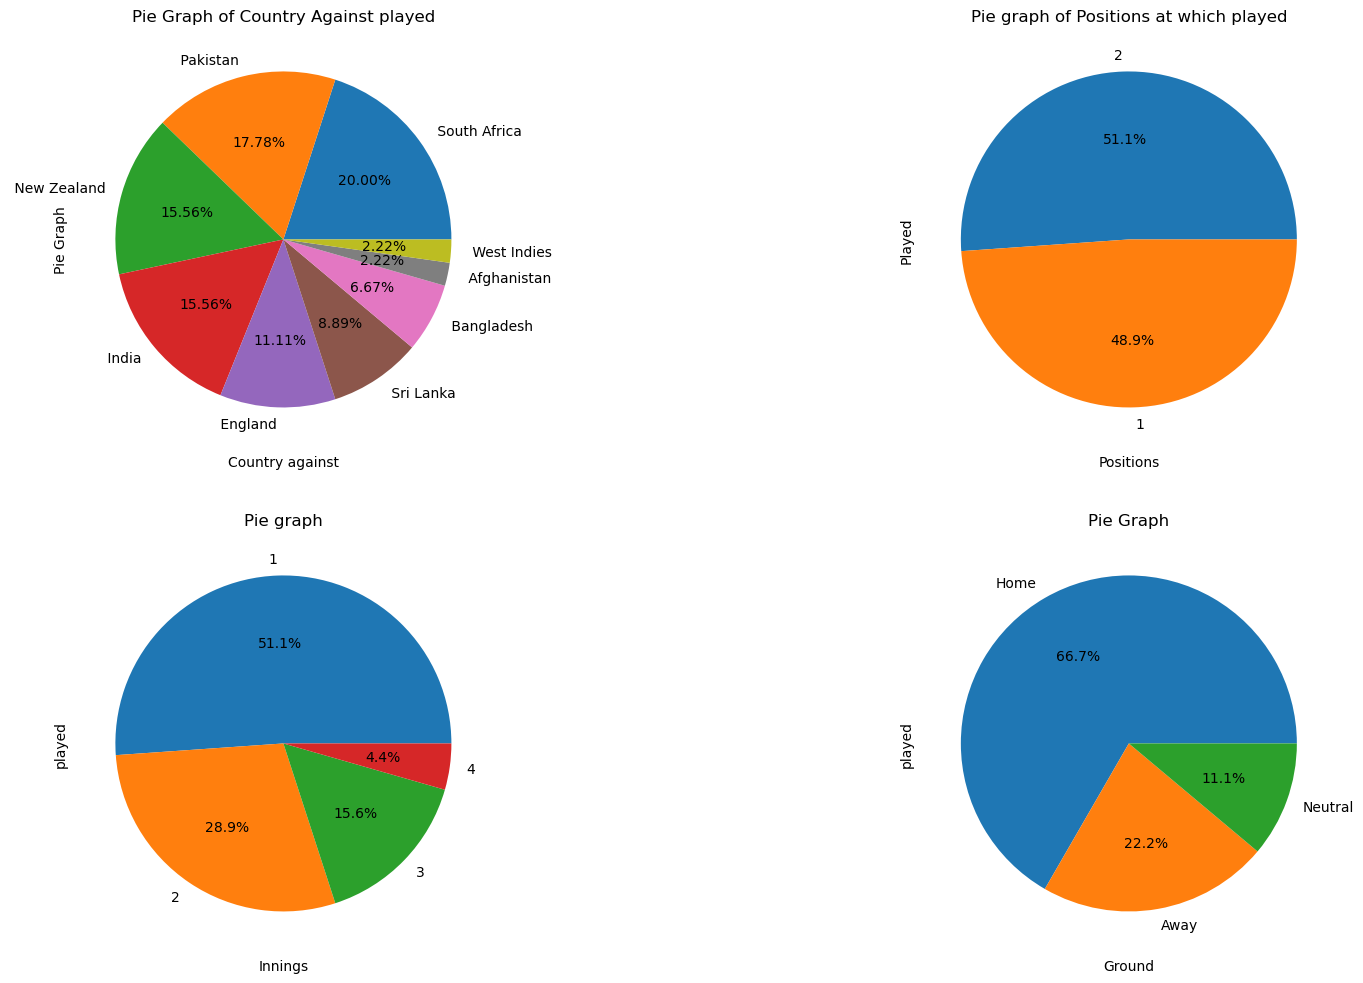

In [24]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
df['Against'].value_counts().plot.pie(autopct='%1.2f%%')
plt.xlabel('Country against')
plt.ylabel('Pie Graph')
plt.title('Pie Graph of Country Against played')
plt.subplot(2,2,2)
df['Position'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Positions')
plt.ylabel('Played')
plt.title('Pie graph of Positions at which played')
plt.subplot(2,2,3)
df['Innings'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Innings')
plt.ylabel('played')
plt.title('Pie graph')
plt.subplot(2,2,4)
df['Ground'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Ground')
plt.ylabel('played')
plt.title('Pie Graph')

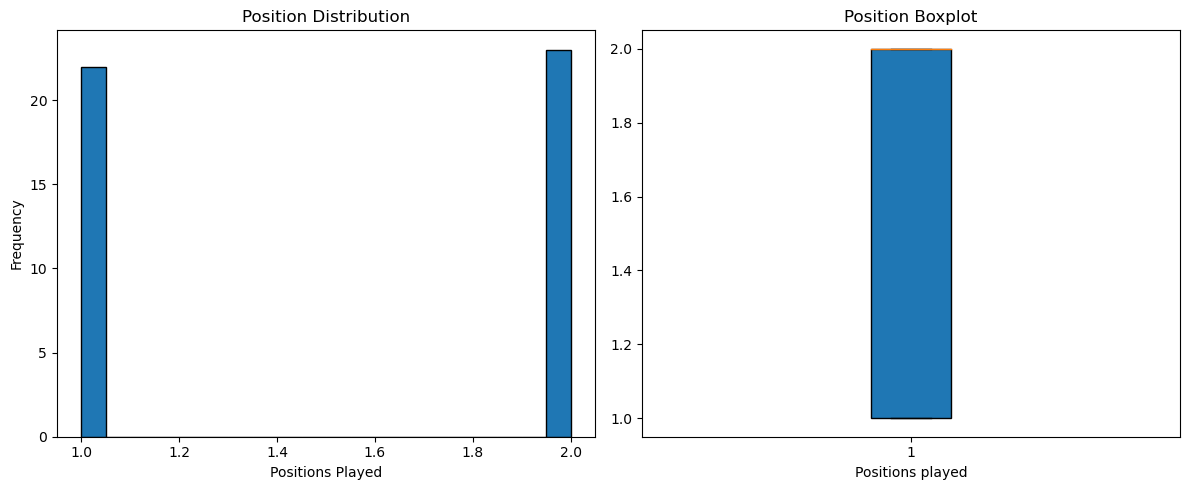

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['Position'], bins=20, edgecolor='black')
axes[0].set_xlabel('Positions Played')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Position Distribution')

# Box Plot
axes[1].boxplot(df['Position'],patch_artist=True)
axes[1].set_xlabel('Positions played')
# axes[1].set_yticklabels([''])
axes[1].set_title('Position Boxplot')

plt.tight_layout()
plt.show()

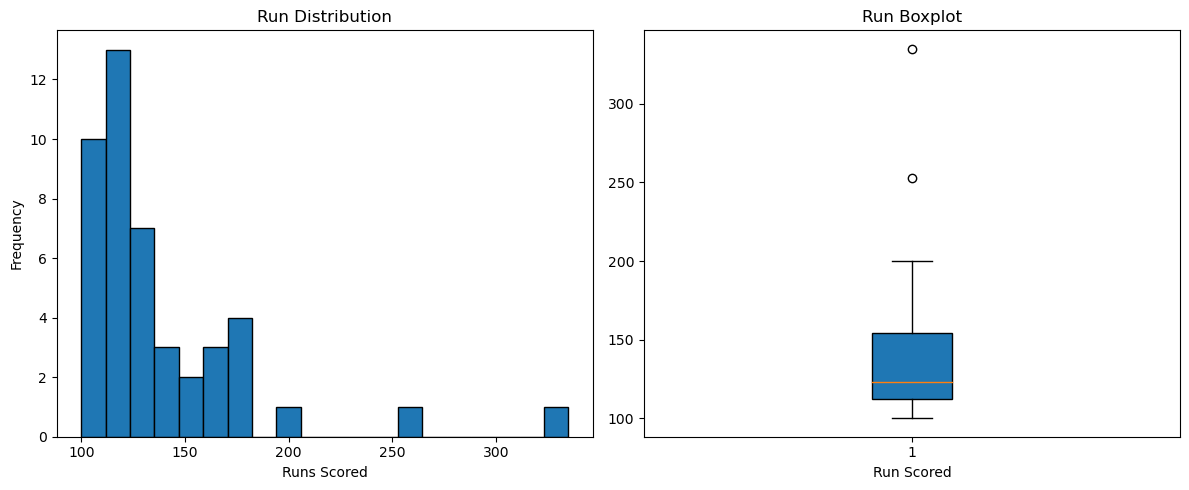

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['Score'], bins=20, edgecolor='black')
axes[0].set_xlabel('Runs Scored')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Run Distribution')

# Box Plot
axes[1].boxplot(df['Score'],patch_artist=True)
axes[1].set_xlabel('Run Scored')
# axes[1].set_yticklabels([''])
axes[1].set_title('Run Boxplot')

plt.tight_layout()
plt.show()

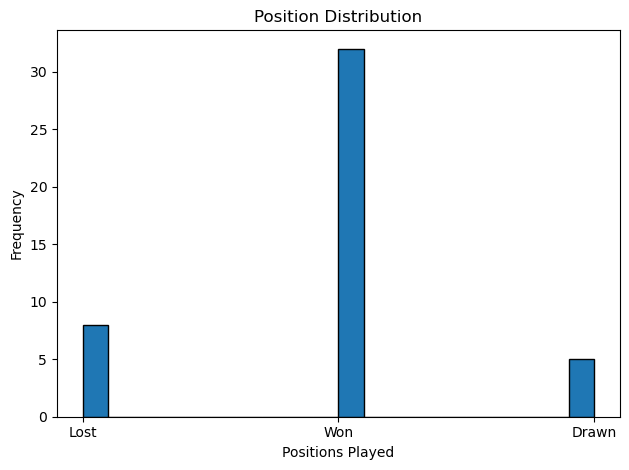

In [27]:
# Histogram
plt.hist(df['Result'], bins=20, edgecolor='black')
plt.xlabel('Positions Played')
plt.ylabel('Frequency')
plt.title('Position Distribution')

plt.tight_layout()
plt.show()

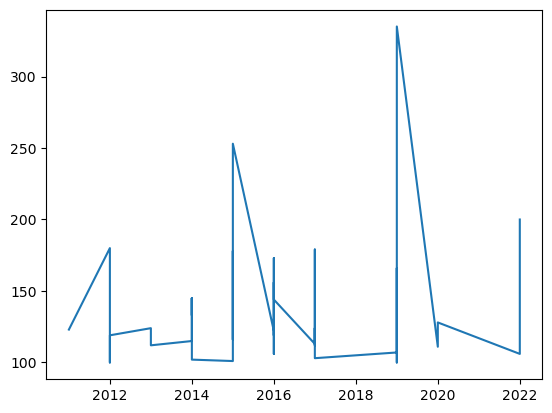

In [28]:
plt.plot(df['Year'],df['Score'])

<Axes: xlabel='Year', ylabel='Score'>

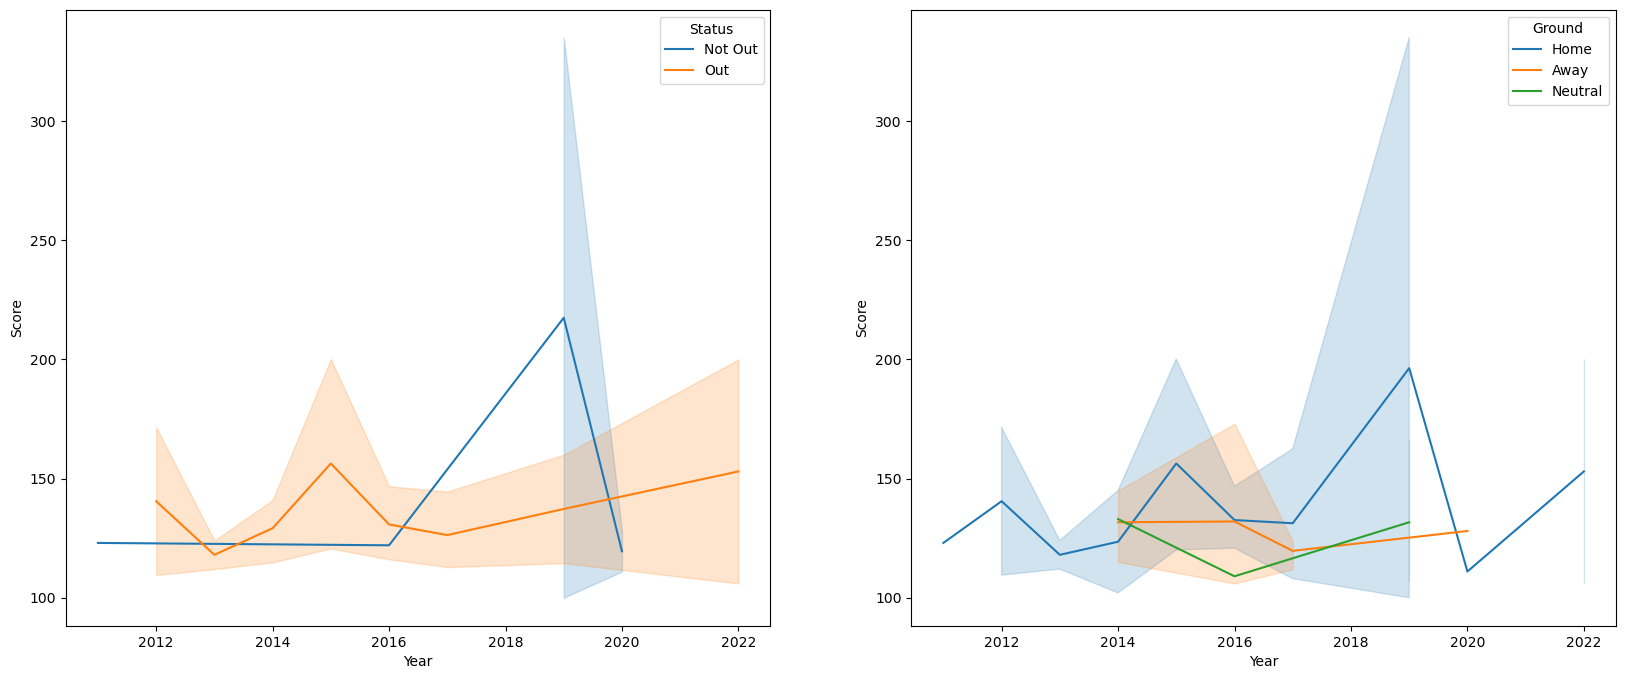

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Score',data=df,hue='Status')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Score',data=df,hue='Ground')

<Axes: xlabel='Year', ylabel='Score'>

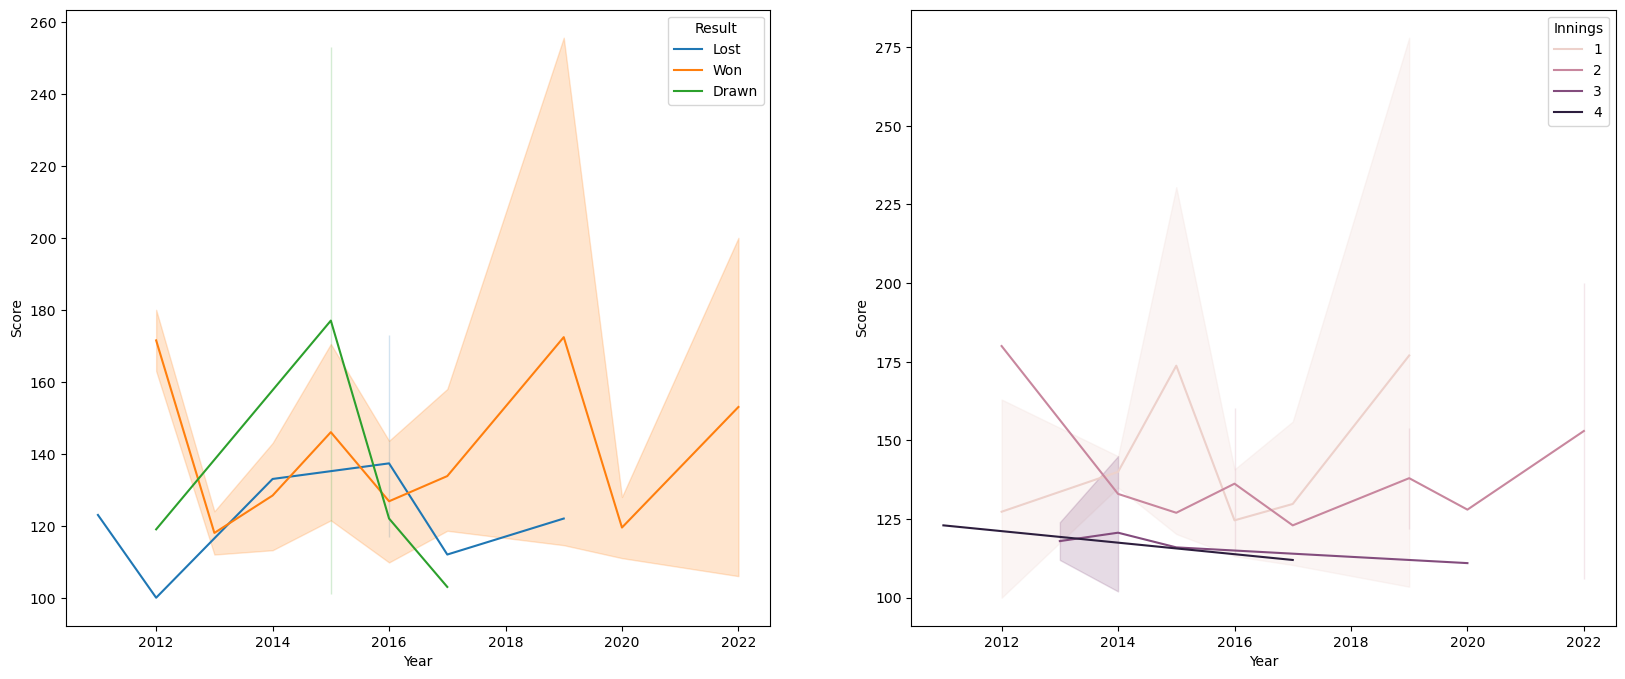

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Score',data=df,hue='Result')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Score',data=df,hue='Innings')

<Axes: xlabel='Year', ylabel='Score'>

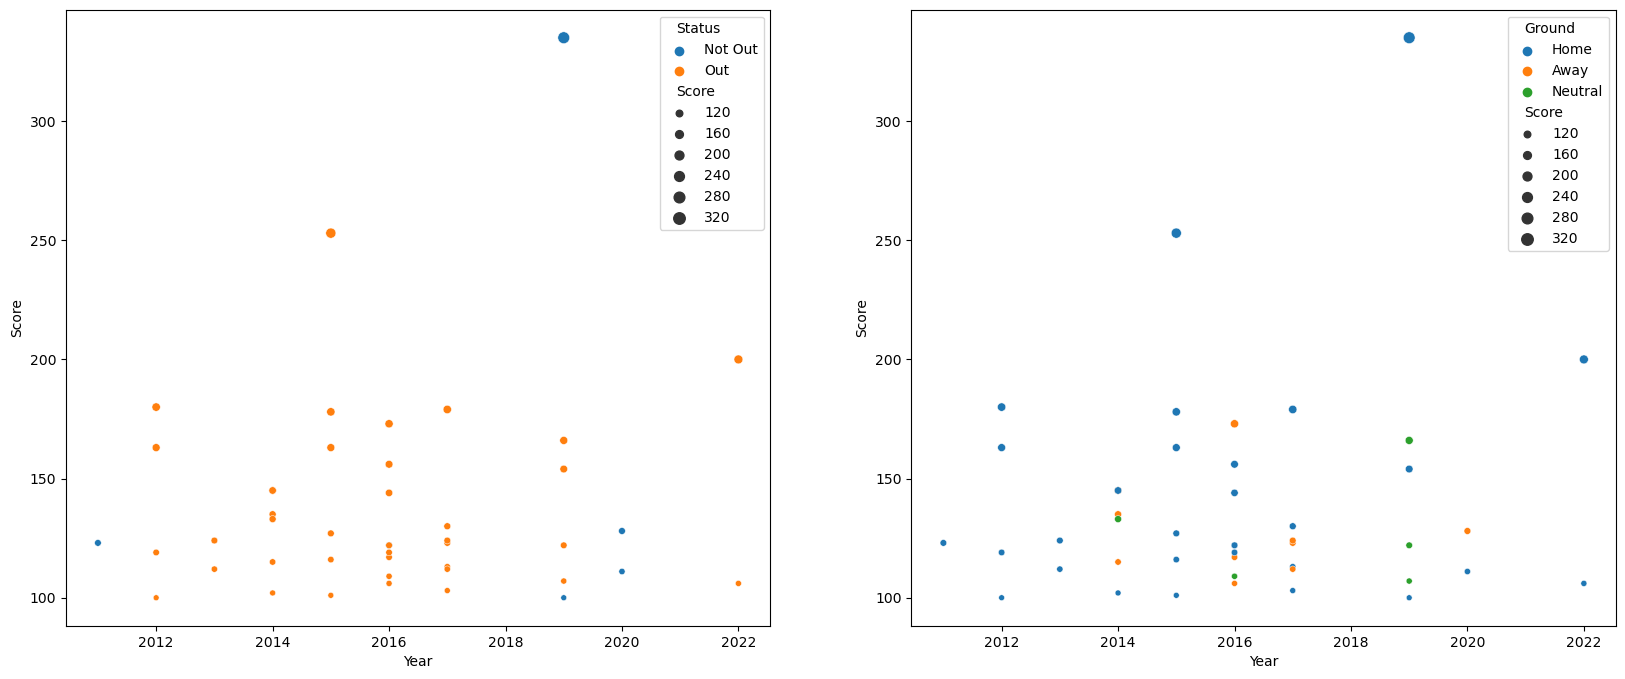

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Year',y='Score',data=df,hue='Status',size='Score')
plt.subplot(1,2,2)
sns.scatterplot(x='Year',y='Score',data=df,hue='Ground',size='Score')